<a href="https://colab.research.google.com/github/lauriejd1/LD665PAP1125-26/blob/main/Supo2_PS_ld665.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervision \#2

## This problem set should be completed once you have finished Lecture 4 '_Working with and visualising climate and environmental data_' and in advance of Supervision \#2

Pt. II, Paper 11: Data Analysis in Climate and Environmental Science \
_November 2025_

In **Lecture 4** we reviewed and (or) covered the following:

*   Logical indexing, cont'd
*   Manipulating time series data
*   Data visualisation techiniques
*   Using Pandas and Xarray to extract tabulated and netCDF data
*   Plotting spatial data using the Cartopy mapping package

_The aims of this supervision problem set_ are for you to become more familiar with:

*   using common data formats (tabular, NetCDF) that include time and spatial structures
*   using functionalities in Pandas, NumPy, and Xarray
*   intuiting use of logical indexing and data parsing
*   developing effective data visualization techniques in Python

**Bringing it all together**

After importing the necessary libraries and filespace, there will be 2 main sections to complete in this problem set. Each section contains several sub-tasks.

_Please acknowledge use of AI-support or otherwise somewhere in your problem set, as applicable._


### Import libraries

In [61]:
## Import NumPy as the object 'np', for your standard suite of mathematical tools
import numpy as np

## Import Pandas as the object 'pd', for reading in tabular data like CSV files
import pandas as pd

## Import Xarray as the object 'xr' for reading in multi-dimensional arrays like netCDF files
import xarray as xr

## Import matplotlib as 'plt' for all things plotting (Hint - you will need pyplot from matplotlib)
import matplotlib.pyplot as plt

### ### ### ### ### ### ### ### ###
### ### ++ Do not modify ++ ### ###

## inline plotting (i.e., show plots in notebook)
%matplotlib inline

## Import Cartopy mapping software as ccrs:
!pip install cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### _Please mount the necessary filespace from our shared Google Drive_:

In [62]:
## As before, you will need to mount your filespace to access files from your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Section 1: Exploring the Central England Temperature (CET) time series

### Movitation / background:

The CET time series is an extraordinary dataset—it's the _oldest_ continuous meteorological record in the world, stretching back to 1659!  It was produced by combining records from locations across central England; early records were from individual observers in larger cities like London, whilst later measurements came from government-provided weather stations across the region. The CET captures daily and monthly temperatures across a central region of England-long before modern climate monitoring began. Because of its long time span, the CET has been widely used by scientists and historians to study how historical weather patterns, seasonal variations, and longer-term climate has changed from the Little Ice Age into present.

(An interesting aside: the driving force behind this dataset, Dr. Gordon Manley, was both an alum and, later, faculty of our very own Department.  In fact, he actually conducted some of his CET compilation efforts _right here_ in Cambridge ... This is a legacy to be proud of!  You can read more about Dr. Manley's CET efforts in the citations below.)

Here, you're going to explore the monthly CET dataset to better understand how our local climate is changing: that is, how seasonal patterns have shifted, how temperature trends have shifted, and where recent temperatures sit from a longer-term context. The aim is for you to develop tools for time series analysis, visualization and interpretation.

##### References on the CET time series, and Dr. Gordon Manley:

Lamb, H.H., Craddock, J.M., Grove, J.M., Oldfield, F. and Tooley, M.J. (1981), The life and work of Professor Gordon Manley (1902–1980). Weather, 36: 220-231. https://doi.org/10.1002/j.1477-8696.1981.tb05407.x

Manley, G. (1953), The mean temperature of central England: 1698-1952. Quarterly Journal of the Royal Meteorological Society, 79, 242-261.

Manley, G. (1974), Central England temperatures: monthly means 1659 to 1973. Quarterly Journal of the Royal Meteorological Society, 100, 389-405.

Parker, D.E., Legg, T.P. and Folland, C.K. (1992), A new daily central England temperature series, 1772–1991. Int. J. Climatol., 12: 317-342. https://doi.org/10.1002/joc.3370120402

## Data
The Hadley Centre (UK MET Office) maintains an up-to-date version of the CET time series, here: https://www.metoffice.gov.uk/hadobs/hadcet/.  The accompanying data file, "CET_Nov2024.csv" was created by going to "Download Data" (https://www.metoffice.gov.uk/hadobs/hadcet/data/download.html), and grabbing the monthly "Mean HadCET Data" for the "Current version (v2.1.0.0)".   

## **1.1**. _Get to know your data_

_Load in the CET series from "CET_Nov2024.csv" using Pandas, and plot time vs. monthly temperature. Please_:
* _ensure accurate labels and x- and y-limits are used, and use a linewidth of 0.5 for your plot_;
* _identify and replace any missing temperature values with something more sensible_.

In [63]:
## 1.1.1
## Load in the CET data file, "CET_Nov2024.csv", using Pandas. Call the imported DataFrame "df".
## Print the values to see what you're dealing with, then make sure to adjust your code to infill
## any missing values in the dataset as NaN's.
filepath = '/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci_202526/L4/CET_Nov2024.csv'
df = pd.read_csv(filepath)


In [64]:
## 1.1.2 Redefine the four variables inside the "df" dataFrame as individual NumPy arrays
## Do not change the variable names that have been provided!
year = df['Year'].values
month = df['Month'].values
time = df['Time_CE'].values
temp = df['Temperature_degC'].values


In [65]:
## 1.1.3 Print the maximum and minimum values in your "temp" dataset to Make sure the range
# of temperature values are valid. Use a single full sentence with f-formatting.
print(f"The temperature ranges from {temp.min():.2f}°C to {temp.max():.2f}°C in the dataset.") #Min and Max temperatures in the database correct to 2.d.p.

The temperature ranges from -99.90°C to 19.80°C in the dataset.


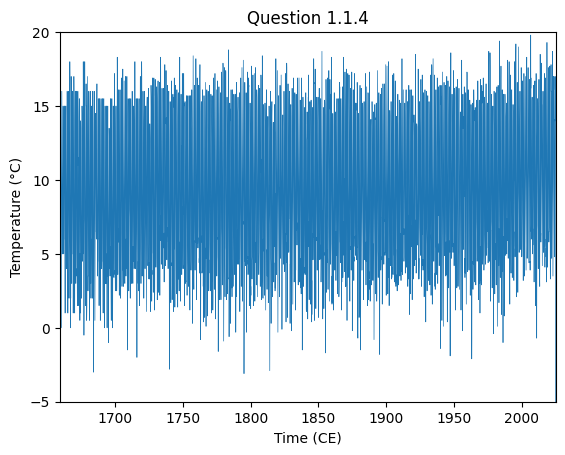

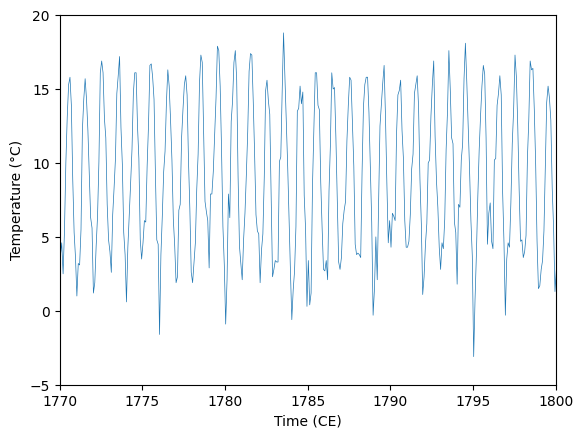

In [66]:
# ## 1.1.4
# Plot the time series up with adequate axis labels and axis limits! Use a linewidth
# of 0.5 in your plot. Title the plot as "Question 1.1.4".
plt.plot(time, temp, linewidth=0.5) #plot variable time against temp, with line width 0.5
plt.xlabel("Time (CE)")
plt.ylabel("Temperature (°C)")
plt.title("Question 1.1.4")
plt.xlim(time.min(), time.max())
#plt.xlim(1950, 2000)
#plt.xlim(1700, 1800)
plt.ylim(-5,20) #Erroreanous data mean that axis limit of -5 - 20C was more appropriate here.
plt.show() #Print the plot for display.

plt.plot(time, temp, linewidth=0.5)
plt.xlabel("Time (CE)")
plt.ylabel("Temperature (°C)")
plt.xlim(1770, 1800)
plt.ylim(-5,20)
plt.show()

#### _Suggestion_:
In your plot, explore around with changing the x-axis limits to smaller and smaller intervals to more clearly see the annual cycles and different periods of variability more clearly!

## **1.2**. _Calculate seasonal mean values_

_Observation_: It's visually challenging to pick out long-term trends when looking at the monthly CET data! That's because there's a lot of data points (>4,000 of them), but also because the amplitude of the seasonal temperature cycle here in England is very large compared the magnitude of long term trends and interannual variations. So, we might like instead to condense this information down to explore trends across individual months, seasons, or across the year.  

_Next, please calculate and plot the seasonal mean temperature time series for the CET_.

In [67]:
## The following function called "CET_seasonal_avg" is provided for you. It creates
## annual time series averaged over any input combination of months.

## 1.2.1
## The function is currently missing comments, making it hard to follow.
## Please provide comments for each line of code, telling what it is doing.
## Keep it succinct; full sentences are not needed, and please do not write
## the equivalent of more than one sentence for each.
## Note: you do NOT need to comment on the descriptive text located between
## the three quotes ("""); however, please write what purpose both of these
## three quotes serve in the function.

def CET_seasonal_avg(year, month, temp, target_months=['Nov']):
    """
    Create an annual time series averaged over multiple target months.
    Parameters:
        year (np.array): Nx1 array of years.
        month (np.array): Nx1 array of months.
        temp (np.array): Nx1 array of temperatures.
        target_months (list): List of months to include (e.g., ['Jan', 'Feb']).
            Defaults to the current month (November).
    Returns:
        np.array: Years.
        np.array: Annual average temperature for the target months.
    """
    mask = np.isin(month, target_months) & ~np.isnan(temp) # Create a mask to select rows where month is within target_months and temp is not NaN
    years = np.unique(year[mask]) # Extract unique years where valid temperature data selected by mask exists
    annual_temps = [] #Empty list to store annual average temperatures
    for y in years: #Loop over each unique year.
        yearly_mask = (year == y) & np.isin(month, target_months) #Mask selecting data for the given year and target months
        avg_temp = np.nanmean(temp[yearly_mask]) #Calculates mean temperature for that year
        annual_temps.append(avg_temp) #Appends annual temperatures to the list.
    return years, np.array(annual_temps)  #Return arrays of years and their corresponding average temperatures





#### 1.2.2 Let's imagine the "year" and "month" columns in CET_Nov2024.csv weren't available for us to index in CET_seasonal_avg, above. There are alternative ways one could still do seasonal averaging using just the `time`  and `temp` variables than the function above! Please describe ONE alternative option and explain the steps required and your reasoning (<150 words)

:Your answer for 1.2.2 here ($<$150 words):
Convert `time` to datetimes and group by year using pandas library and a Object Orientated approach. E.g. `ts = pd.to_datetime(time)` (Parse times)., `df = pd.DataFrame({'time': ts, 'temp':temp}).set_index('time')`, Select Months `df = df[df.index.month.isin([11])]` (More months can be added using a list for seasons), `df.groupby(df.index.year).temp.mean()` to group by year, finally you need to extract years and averages `years = annual.index.year; vals = annual.temp.values`

___
This real date/time indexing avoids needing separate `year`/`month` coloumns, error checks for missing values, whilst also taking advantage of pandas time efficient grouping nd resampling for correct seasonal aggregations.

---

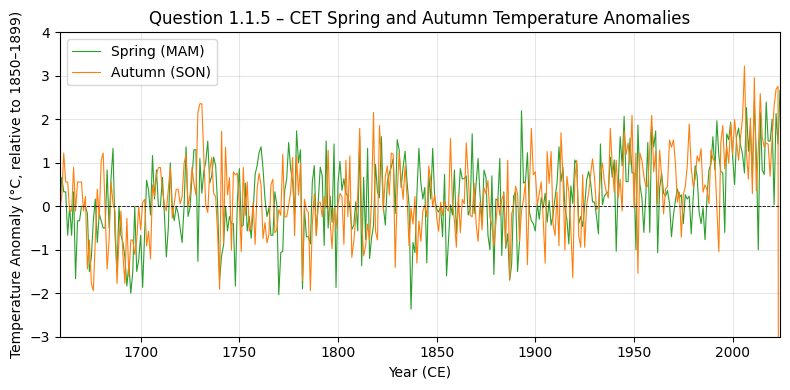

In [68]:
## 1.2.3
## Please create a well-annotated time series plot showing spring (MAM) and autumn (SON)
## CET temperatures as anomalies relative to 1850-1899 CE, using relevant output from
## the "CET_seasonal_avg" function.
years_MAM, temp_MAM = CET_seasonal_avg(year, month, temp, target_months=['Mar', 'Apr', 'May']) #Uses CET_Seasonal_Average function to compute seasonal averages for March, April, May (Spring)
years_SON, temp_SON = CET_seasonal_avg(year, month, temp, target_months=['Sep', 'Oct', 'Nov']) #Uses CET_Seasonal_Average function to compute seasonal averages for September, October, November (Autumn)

##Calculate 1850–1899 climatological baseline for each season
baseline_MAM = np.mean(temp_MAM[(years_MAM >= 1850) & (years_MAM <= 1899)])
baseline_SON = np.mean(temp_SON[(years_SON >= 1850) & (years_SON <= 1899)])

##Compute anomalies relative to 1850–1899
anom_MAM = temp_MAM - baseline_MAM
anom_SON = temp_SON - baseline_SON

##Plotting
plt.figure(figsize=(8, 4))
##Plot MAM and SON anomalies using seasonal colours for differentiation
plt.plot(years_MAM, anom_MAM, label='Spring (MAM)', color='tab:green', linewidth=0.8)
plt.plot(years_SON, anom_SON, label='Autumn (SON)', color='tab:orange', linewidth=0.8)

##Add baseline of zero for reference
plt.axhline(0, color='black', linewidth=0.6, linestyle='--')

##Meaninful limits
plt.ylim(-3,4)
plt.xlim(1659, 2024)

##Axis titles
plt.xlabel('Year (CE)')
plt.ylabel('Temperature Anomaly (°C, relative to 1850–1899)')
plt.title('Question 1.1.5 – CET Spring and Autumn Temperature Anomalies')
plt.legend() #Add legend for interpretation
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## **1.3**. _Visualising temperature anomalies in a more illuminating way_

_We might care about the proportion of years where temperature deviations are highly anomalous relative to some reference period._

_For this part, you're first going to calculate seasonal temperature anomalies of your choosing relative to the pre-1900 CE interval.  Then, for the three 40-yr periods starting in 1900 CE, you're going to calculate the proportion of years >2$\sigma$ (2 standard deviations) above the pre-1900 CE mean._

Finally, you'll plot the temperature anomalies in a more visually appealing way: red bars for positive anomalies, blue bars for negative anomalies (see example, here: https://www.globalchange.gov/indicators/global-surface-temperatures), with the 2$\sigma$ level shown for comparison._

In [69]:
## 1.3.1
## Choose a month(s) or season you plan to explore!
print("") # leave this empty
print("1.3.1: I am going to analyse the month(s) June–August (Summer, JJA)")





1.3.1: I am going to analyse the month(s) June–August (Summer, JJA)


In [70]:
## 1.3.2
## Calculate the pre-1900 anomalies for the annual average month(s) you chose, above,
## and define the resultant array as "temp_anom". (Note, you'll need to first output a
## new temperature array using "CET_seasonal_avg" for your chosen month(s), above).
## Then, calculate the "2sigma level" for all the pre-1900 years ( i.e., 2 standard
## deviations above the pre-1900 mean of temp_anom using "np.std" ) as a floating
## variable call "threshold".
## Use "np.std" to calculate "threshold" (https://numpy.org/doc/stable/reference/generated/numpy.std.html)

years_JJA, temp_JJA = CET_seasonal_avg(year, month, temp, target_months=['Jun', 'Jul', 'Aug']) #seasonal mean temperature using the CET_seasonal_avg function
pre1900_mean = np.mean(temp_JJA[years_JJA < 1900]) #Calculate the pre-1900 mean temperature
temp_anom = temp_JJA - pre1900_mean #Calculate anomies relative to mean.
threshold = 2 * np.std(temp_anom[years_JJA < 1900]) #Calculate 2σ threshold from pre-1900 data


In [71]:
## 1.3.3
## Calculate then print out the proportion of years in each post-1900 CE 40-year period
## where temperature anomalies exceed the 2sigma "theshold". This will require a 'for'
## loop and logical indexing.
periods = [(1900, 1939), (1940, 1979), (1980, 2019)] # this defines the three post-1900 CE 40-year periods as a list
for start, end in periods:
    # The following line is only meant to illustrate how the "start", "end" values work in this loop (you can comment this out):
    print(f'The current loop spans the period {start}-{end} CE') # comment this out once you see what start, end do in the loop

    # Do your calculations here, incorporating "start" and "end" directly into your indexing:
    mask = (years_JJA >= start) & (years_JJA <= end) ## Logical indexing for years in the current period
    exceed = np.sum(temp_anom[mask] > threshold)
    total = np.sum(mask)
    # Use f-formatting to print the percentage of years for the current period, rounding to two decimal points:
    proportion = (exceed / total) * 100
    print(f"Between {start}-{end}, {proportion:.2f}% of years exceeded 2σ above the pre-1900 mean.")


The current loop spans the period 1900-1939 CE
Between 1900-1939, 5.00% of years exceeded 2σ above the pre-1900 mean.
The current loop spans the period 1940-1979 CE
Between 1940-1979, 7.50% of years exceeded 2σ above the pre-1900 mean.
The current loop spans the period 1980-2019 CE
Between 1980-2019, 12.50% of years exceeded 2σ above the pre-1900 mean.


In [72]:
## 1.3.4
## The below line of code assigns a color of "red" or "blue" to each element of "temp_anom"
colors = ['red' if tempi > 0 else 'blue' for tempi in temp_anom]
## In <= 2 sentences, explain how this single line of code combines both conditional logic and a for loop
## to create the array "colors"?
print("") # leave this empty
print("1.3.4: This line loops through each temperature anomaly ('for tempi in temp_anom') and applies conditional logic to assign 'red' if the anomaly is positive, otherwise 'blue', creating a colour list for the bars.")




1.3.4: This line loops through each temperature anomaly ('for tempi in temp_anom') and applies conditional logic to assign 'red' if the anomaly is positive, otherwise 'blue', creating a colour list for the bars.


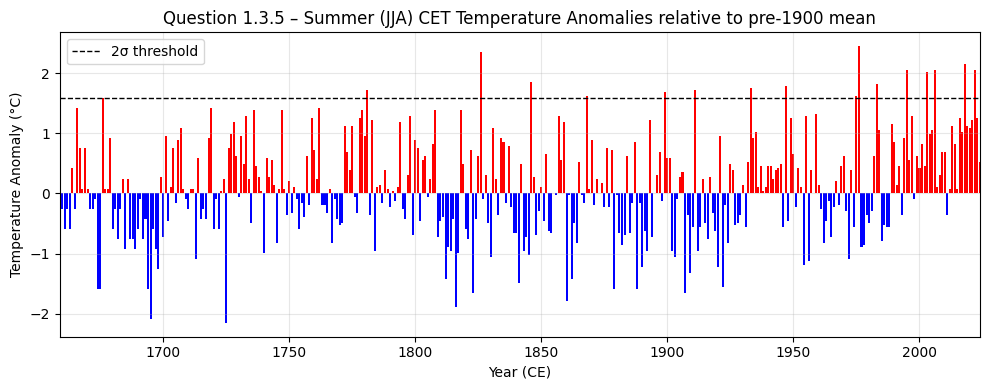

In [73]:
## 1.3.5
## Create a bar plot of temp_anom, using the "colors" array to assign the bar colors correctly.
## Please make sure your labels and axis limits are correct. Plot the 2sigma threshold level as
## a horizontal dashed black line. Define a label for the 2sigma level and define it in a legend
## See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.figure(figsize=(10, 4))
plt.bar(years_JJA, temp_anom, color=colors, width=0.8)

# Add the 2σ threshold line
plt.axhline(threshold, color='black', linestyle='--', linewidth=1, label='2σ threshold')

# Labels, title, limits, and legend
plt.xlabel('Year (CE)')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Question 1.3.5 – Summer (JJA) CET Temperature Anomalies relative to pre-1900 mean')
plt.legend()
plt.xlim(years_JJA.min(), years_JJA.max())
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 1.3.6 Do the proportions of years with temperature anomalies above the 2-sigma "threshold" in the post-1900 CE periods match what we'd expect if the climate had NOT changed since before 1900? Explain your reasoning. (Hint: Use the 68-95-99.7 rule -- https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

Your answer for 1.3.6 here ($<$100 words):

___
In short, No. The proportions of years above the 2σ threshold do not match what is expected if the climate had not changed since before 1900.
According to the 68–95–99.7 rule, only about 2.5% of years should lie above +2σ in an unchanged and unimpacted climate.
The post-1900 periods, the proportion of >2σ years is much higher (especially after 1980), indicating that temperatures have shifted upward relative to the pre-1900 baseline.
This increase in extreme warm years shows that the climate distribution is no longer stable and has warmed significantly since the 19th century.

---


## **1.4**. _Warming stripes: a powerful way to visualise global warming_

Time series are useful, but there are other visually arresting ways to showcase climate trends.

_Use the mean-annual CET time series to create a "Warming stripes" diagram (https://en.wikipedia.org/wiki/Warming_stripes).  Follow the example given here, copying and changing **relevant** components: https://matplotlib.org/matplotblog/posts/warming-stripes/._

**Note** This is meant to be a challenge in code adaptation and data visualisation: you will be using somebody else's coded example, adapted to your own purpose/dataset (a practice that is VERY common in data analysis). Give it a go!

Hints: \
I got the below plot by setting ``LIM = 1.75``, and setting the ``reference`` to the mean temperature between 1950 and 1980 -- play around with what works well to your eye!

<!-- <img src="/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci/L2/warming_stripe_CET_annual.png" alt="Question 1.4 example" width="50%" />  -->

![Question 1.4 example](https://drive.google.com/uc?id=1xn7WjeiKfjI5Qt__tXpC37KsLqvfuhgP)




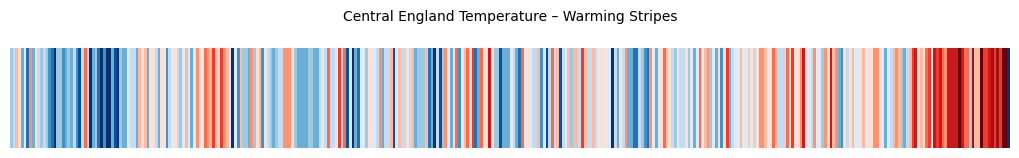

In [81]:
## 1.4.1
## Create the warming stripes diagram, adapting code from
## https://matplotlib.org/matplotblog/posts/warming-stripes/
## Copy and adjust your code, below:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

unique_years = np.arange(np.min(year), np.max(year)+1)
annual_mean = np.array([np.mean(temp[year == y]) for y in unique_years]) #With thanks to Google Geminini (adapted from provided code)

FIRST_REFERENCE = 1960
LAST_REFERENCE = 1980
LIM = 1.75

# Reference temperature (mean over reference period)
reference = np.mean(annual_mean[(unique_years >= FIRST_REFERENCE) & (unique_years <= LAST_REFERENCE)])


# This is a 16-color blue-to-red discrete colormap (with thanks to Nöthe, 2019 matplotlib.)
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

rects = [Rectangle((y, 0), 1, 1) for y in unique_years]
col = PatchCollection(rects, cmap=cmap)

# Map annual temperatures to the colormap
col.set_array(annual_mean)
col.set_clim(reference - LIM, reference + LIM)

fig = plt.figure(figsize=(10, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()
ax.add_collection(col)

# Set limits so stripes fill the figure
ax.set_xlim(unique_years[0], unique_years[-1]+1)
ax.set_ylim(0, 1)

# Title
plt.title('Central England Temperature – Warming Stripes', loc='center', fontsize=10, pad=20)

# Save and show
plt.savefig('CET_warming_stripes.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1.4.2  What challenges did you face when adapting someone else's code for your specific dataset,and how did you approach understanding and modifying it?

Your answer for 1.4.2 here ($<$150 words):
___
The main difficulty was interpreting different data types, and variable names as well as bounds, and the colour maps, and adapting these to the CET dataset in question. It took a lot of trial and error and error checking to resolve these issues, and ensure that the visulisation is correct. In summary, the main issues were around understanding the original code logic. For example, the codee assumes `anual_mean` is a 1D numeric array and `years` are numeric and sequential.

---

#### 1.4.3  How does the "warming stripes" visualisation communicate climate change effectively, and what potential limitations or biases underpin this minimalist approach?

Your answer for 1.4.3 here ($<$200 words):

---
# Effective Visulisation
Immediate visual impact, as each year is represented by a vertical stripe coloured by its temperature relative to the period in question, with easy to pickup correlations in warming period.
Distractions such as grid lines, and axis are removed, makint the visulisation easy to interpret as it focoses on etmperature change over time. Trend is memorable and engaging, with cold and hot, correlating to blue and red.

----
# Limitations & Biases
Loss of quantative data, rates of change and variability are not shown. Magnitude of warming cannot be depicted from colours alone.
Temporal resolution, hides seasonal or intra-year variability, with extreme cold events being smoothed out.

## Part 2: Exploring historical UK spatial precipitation patterns

#### Movitation / background:

This one's personal.  

Before moving to Cambridge from the dry, sunny US Southwest, I was told "It'd be an easy transition because Cambridge is the driest, sunniest place in the UK".  (Regardless of whether this is true, I sometimes can't help but feel cheated by this claim!)

For Part 2, you're going to help me decide whether my feelings are validated or not, by mapping the observed spatial precipitation patterns across the UK to find the _true_ driest place in the UK.
                                                                                     

## Data
The UK Met Office maintains an up-to-date version of gridded climate variables across the UK, via a product called _HadUK-Grid_.  This product is derived by interpolating land-based meteorological station data across the UK, spanning back to 1836. The grids are available for numerous variables including air temperature, precipitation, sunshine, mean sea level pressure, wind speed, relative humidity, vapour pressure, days of snow lying, and days of ground frost, spanning daily, monthly, up to >annual timescales.

In our Google Drive folder repository you've been provided a netCDF file called _"rainfall_hadukgrid_uk_5km_ann-30y_199101-202012.nc"_ which contains the 5 km-gridded precipitation values for the UK. These data and many others are publicly available from the Centre for Environmental Data Analysis (CEDA):

Met Office; Hollis, D.; McCarthy, M.; Kendon, M.; Legg, T.; Simpson, I. (2018): HadUK-Grid gridded and regional average climate observations for the UK. Centre for Environmental Data Analysis, October 15, 2024. http://catalogue.ceda.ac.uk/uuid/4dc8450d889a491ebb20e724debe2dfb/


### **2.1**. _Open and explore the dataset using xarray_

_Open the netCDF file "rainfall_hadukgrid_uk_5km_ann-30y_199101-202012.nc" using XArray, and print out the variables included in the file._

https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html

In [82]:
## 2.1.1
## Define filepath to the datafile (*.nc)
filepath = "/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci_202526/L4/rainfall_hadukgrid_uk_5km_ann-30y_199101-202012.nc" #import from shared google drive.

## 2.1.2
## Use the filepath to open the netCDF datafile in xarray, call the array "ds"
import xarray as xr
ds = xr.open_dataset(filepath)

## 2.1.3
## Print information on the variables stored in the netCDF file
print(ds)

## 2.1.4
## What are the relevant variables you'll need to extract to plot rainfall:
print(" ") # leave this empty
print("2.1.4: The relevant variables needing to be extracted are ['rainfall', 'latitude', 'longitude', 'time'].")



<xarray.Dataset> Size: 1MB
Dimensions:                       (time: 1, projection_y_coordinate: 290,
                                   projection_x_coordinate: 180, bnds: 2)
Coordinates:
  * time                          (time) datetime64[ns] 8B 1991-07-01
  * projection_y_coordinate       (projection_y_coordinate) float64 2kB -1.97...
  * projection_x_coordinate       (projection_x_coordinate) float64 1kB -1.97...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 418kB ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 418kB ...
Dimensions without coordinates: bnds
Data variables:
    rainfall                      (time, projection_y_coordinate, projection_x_coordinate) float64 418kB ...
    transverse_mercator           int32 4B ...
    time_bnds                     (time, bnds) datetime64[ns] 16B ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 5kB ...
    projectio

### **2.2**. _Extract the relevant variables_

_Load in the relevant data as unique variable names from "rainfall_hadukgrid_uk_5km_ann-30y_199101-202012.nc" using XArray, print their dimensions, and answer the following questions._

https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html

In [83]:
## 2.2.1
# For ease, extract the relevant variables you need for plotting from "ds" and print their dimensions
# https://numpy.org/doc/2.0/reference/generated/numpy.shape.html
latitude = ds['latitude']
longitude = ds['longitude']
rainfall = ds['rainfall']
# ...and print their dimensions:
print("Latitude dimensions:", latitude.shape)
print("Longitude dimensions:", longitude.shape)
print("Rainfall dimensions:", rainfall.shape)

## 2.2.2
# Why might latitude and longitude be 2D arrays rather than 1D arrays?
print("")
print("2.2.2: Latitude and longitude are 2D arrays because the grid uses a map projection (transverse Mercator), so each grid cell has its own specific latitude and longitude. This accounts for distortions from projecting a curved surface onto a flat grid.")


## 2.2.3
# What are singleton dimensions, and what dimension of "rainfall" is a "singleton" dimension?
print("")
print("2.2.3: A singleton dimension is a dimension of size 1, meaning it only contains a single value along that axis. In 'rainfall', the 'time' dimension is a singleton because this dataset is a 30-year annual climatology represented as a single time slice.")


## 2.2.4
# Remove the singleton dimension of rainfall. Confirm by rechecking the shape of "rainfall"
# Singleton dimensions can be removed either by "squeezing" the data, or taking the mean along the relevant dimension
# https://numpy.org/doc/2.0/reference/generated/numpy.squeeze.html
rainfall = rainfall.squeeze()
print("Rainfall shape after removing singleton dimension:", rainfall.shape)



Latitude dimensions: (290, 180)
Longitude dimensions: (290, 180)
Rainfall dimensions: (1, 290, 180)

2.2.2: Latitude and longitude are 2D arrays because the grid uses a map projection (transverse Mercator), so each grid cell has its own specific latitude and longitude. This accounts for distortions from projecting a curved surface onto a flat grid.

2.2.3: A singleton dimension is a dimension of size 1, meaning it only contains a single value along that axis. In 'rainfall', the 'time' dimension is a singleton because this dataset is a 30-year annual climatology represented as a single time slice.
Rainfall shape after removing singleton dimension: (290, 180)


### **2.3**. _Find the driest UK location_

_Next, your task is to find the coordinates of the driest location in the UK ... is it Cambridge?!_


In [84]:
## 2.3.1
# Next, the following line of code should*** find the indices of the minimum rainfall value for you.
# There are three operations happening (i.e., functions being called) in this single line of code;
# please explain what these three operations are doing (<100 words in the text block below)?
# ***NOTE: I've named the "latitude" and "rainfall" variables stored in our netCDF accordingly.  If
#      you've called these arrays something different, please change line of code below accordingly!
min_coords = np.unravel_index(np.nanargmin(rainfall), latitude.shape)



## 2.3.2
# Print the coordinates for the driest location in the UK so that it reads:
# "The driest location in the UK is at __˚N and __˚E"
# ...rounding to two decimal places.
row, col = min_coords
driest_lat = latitude[row, col].values
driest_lon = longitude[row, col].values
print(f"The driest location in the UK is at {driest_lat:.2f}˚N and {driest_lon:.2f}˚E.") #rounded to 2.s.f

The driest location in the UK is at 51.41˚N and 0.91˚E.


Your answer for 2.3.1 here ($<$100 words):
___
#np.nanargmin(rainfall)
Finds the index of the minimum value in rainfall, Returns a single integer as if the array were flattened.
#latitude.shape
Retrieves the shape of the latitude array, which is the 2D grid dimensions (rows × columns).
#np.unravel_index(..., latitude.shape)
Converts the flattened index from nanargmin into a 2D (row, column) index corresponding to orginal grid.

---

### **2.4**. _Plot UK precipitation_

_Finally, plot a map of UK precipitation, denoting the locations of Cambridge vs. the driest UK location. **Follow the example provided in Lecture 2!**_

##### Plot data on map

(2.4.1) Define map projection `ccrs.PlateCarree()` <br>
https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html.  Call the map projection `proj`.

(2.4.2) Define the new figure size and axis parameters.

(2.4.3) Set color levels for figure (uncomment list by removing the leading #) <br>

(2.4.4) Set colormap: `BrBG`  <br>
https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

(2.4.5) Use `plt.contourf()` to plot **rainfall** as a function of **latitude** and **longitude**. <br>
https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.contour.html

(2.4.6) Define a horizontal colorbar with ticks at the specified color levels <br>
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.colorbar.html
* _Note_: Note the ``extend`` parameter should be adjusted such that the colourbar arrow points only toward maximum precipitation values (assuming your minimum precipitation value is set as 0). <br>

(2.4.7) Set an appropriate label on the colorbar with a fontsize of 12 <br>
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.colorbar.html
* _Note_: the correct units of the rainfall field can be found and set directly from the netCDF file -- search for it! <br>

(2.4.8) Add coastlines <br>
https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

(2.4.9) Use ``plt.scatter()`` to add scatter points for Cambridge (make a red circle) and the driest location (make a yellow star) <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
* _Note_: Label the scatter points using label="<your label>", so you can denote each via a legend! <br>
* _Note_: Set the keyword argument `transform=proj`, from step (2.4.1).

(2.4.10) Add a legend denoting your location scatter points.  Note you need to assign labels in the prior step!
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    
Here's what my version looks like -- feel free to give yourself some small artistic discretion.
    
<!-- <img src="Map_of_UK_precipitation.png" alt="Map of UK_precipitation example" width="75%" />   -->

![Question 2.4 example](https://drive.google.com/uc?id=1IS_3sWMyyb4Q1b8JdhS4ouaqo6eB9dgu)

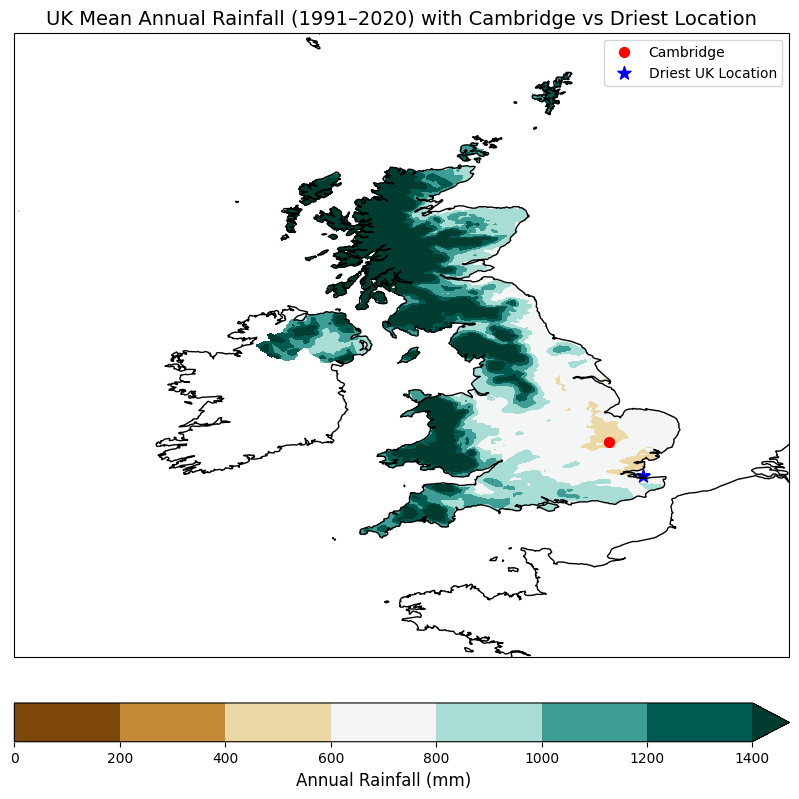

In [89]:
## Your code for 2.4, here (please refer to the lecture example)

proj = ccrs.PlateCarree()  # simple lat/lon projection
fig = plt.figure(figsize=(10, 12)) #fig size, approriate boundaries
ax = plt.axes(projection=proj)


levels = [0, 200, 400, 600, 800, 1000, 1200, 1400]  # mm/year, rainfall bondaries
cmap = 'BrBG' # Colourmap set


##Plot rainfall using contourf
rain_data = rainfall.values  # after squeezing singleton dimension
lat_data = latitude.values
lon_data = longitude.values
cs = plt.contourf(lon_data, lat_data, rain_data, levels=levels, cmap=cmap,
                  extend='max', transform=proj)


##Add horizontal colorbar
cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ticks=levels)
cbar.set_label(f'Annual Rainfall ({ds["rainfall"].attrs.get("units","mm")})', fontsize=12)

##Add coastlines to the map.
ax.coastlines(resolution='10m')

# Cambridge coordinates
cambridge_lat = 52.2053
cambridge_lon = 0.1218

# Driest location (taken from previous task)
driest_lat = latitude[min_coords].values
driest_lon = longitude[min_coords].values

# Scatter points
plt.scatter(cambridge_lon, cambridge_lat, color='red', s=50, marker='o', label='Cambridge', transform=proj)
plt.scatter(driest_lon, driest_lat, color='blue', s=100, marker='*', label='Driest UK Location', transform=proj)

##Legend for easier interpretation in upper right.
plt.legend(loc='upper right')

# Add title
plt.title('UK Mean Annual Rainfall (1991–2020) with Cambridge vs Driest Location', fontsize=14)

#Show plot.
plt.show()

## **2.5**. _Does Cambridge have the driest climate in the UK?_


In [86]:
## 2.5
print("< Your answer here, in one emphatic word > No :(, driest place surprisngly is near Sheerness on the coast )")

< Your answer here, in one emphatic word > No :(, driest place surprisngly is near Sheerness on the coast )


## End of Supervision \#2 Problem Set

#### Once completed, please save this script as **$<$_your_surname_$>$_Supo2.ipynb** and send to either Matt (mo549@cam.ac.uk) or Becky (rld46@cam.ac.uk) before your supervision session.
